# Self-Driving Car Engineer Nanodegree

Kwanghyun JUNG
ihangulo@gmail.com

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [81]:
# Load pickled data
import pickle
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file = 'lab2data/train.p'
testing_file = 'lab2data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Original train set : soon split to "train / 
X_train, y_train = train['features'], train['labels']

# Final test set
X_test, y_test = test['features'], test['labels']

# recover memory
del train
del test

In [82]:
## To start off let's do a basic data summary.
n_train = len(X_train) #number of training examples
n_test = len(X_test) # number of testing examples
image_shape = X_train.shape # what's the shape of an image?
n_classes = len(np.unique(y_train))# how many classes are in the dataset

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


num of unique labels =  43


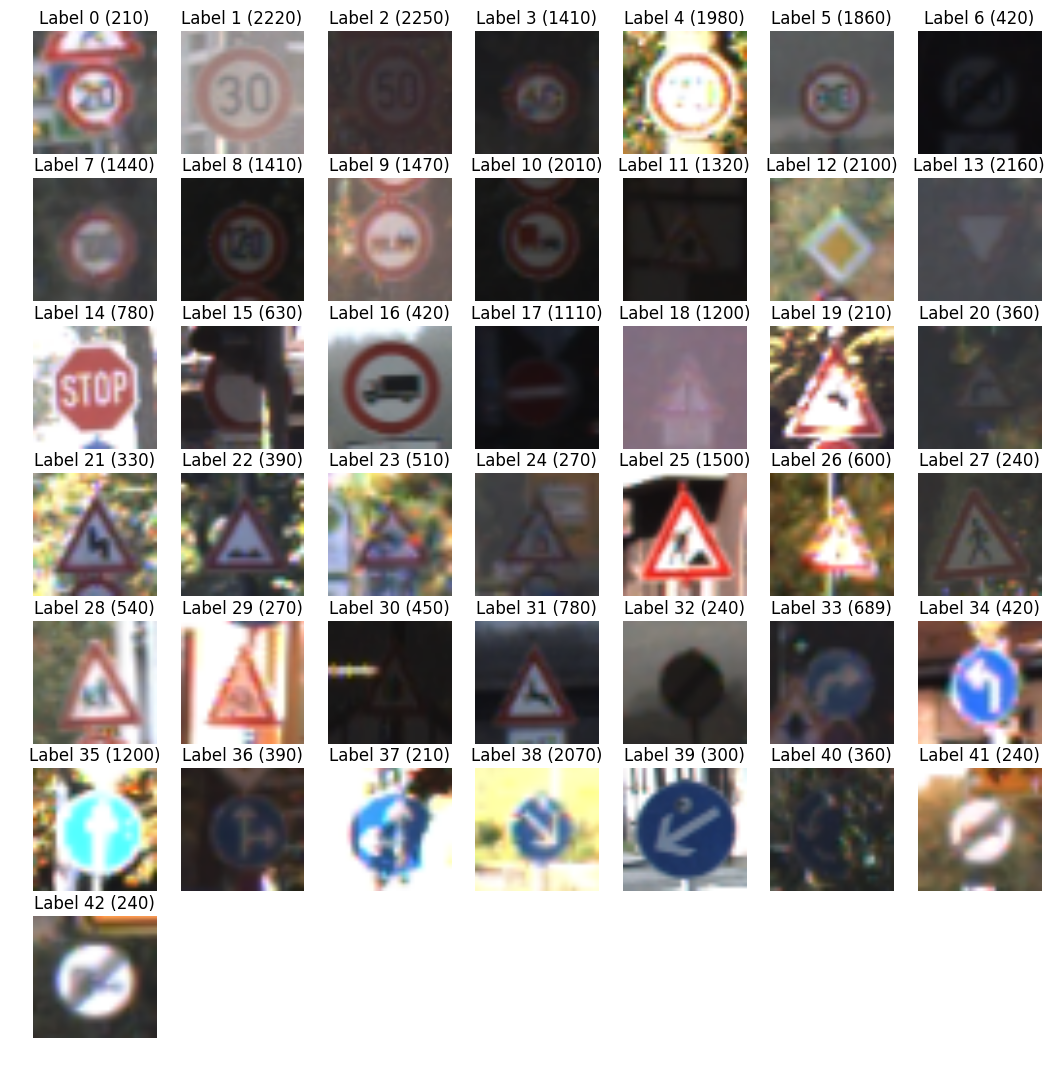

In [83]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Original source : https://github.com/waleedka/traffic-signs-tensorflow/blob/master/notebook1.ipynb 

# show the unique first images with label from many traffic pics.
def display_unique_images_and_labels(images, labels):
    unique_labels = np.unique(labels)
    print ("num of unique labels = ", len(unique_labels))
    plt.figure(figsize=(13, 13))
    i = 1
    for label in unique_labels:
       # Pick the first image for each label.
        image = images[labels.index(label)]
        
        plt.subplot(7, 7, i)  # A grid of 8 rows x 6 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
                        
    plt.show() # show up all data

display_unique_images_and_labels(X_train, y_train.tolist())

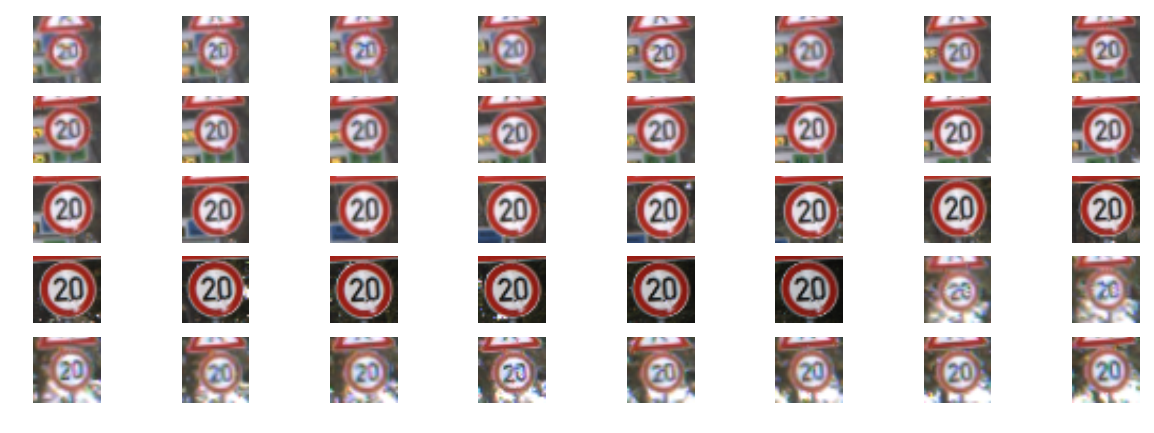

In [84]:
# dispay speicific indexed traffic sign

def display_label_images(images, labels, label_index):
    """Display images of a specific label."""
    limit = 40  # show a max of 16 images
    plt.figure(figsize=(15, 5))
    i = 1

    images_list =[]
    
    for num in range(0, len(labels)):
        if(labels[num] == labels[label_index]): # check value
            images_list.append(num) # make lists
            if (len(images_list) >= limit) :
                break;
        
    for images_index in images_list :
        image = images[images_index]
        plt.subplot(5, 8, i)  # 5 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(X_train,y_train, 0) # if change last variable then you can get that index pictures


sign= ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Pre process:
- split train set into "train set / validation set (90% : 10%)'    
- rgb to grayscale and normalize value [0~1] (fast & efficient process)
- Reformat into a TensorFlow-friendly shape: 
    - convolutions need the image data formatted as a cube (width by height by #channels) 
    - labels as float 1-hot encodings.


# num of new train set =  35288
# num of new validation set =  3921

*Before
X_train.shape:  (35288, 32, 32, 3)
X_train Range of value = 0 ~ 255
y_train.shape:  (35288,)
y_train[0]:  17


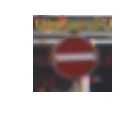

*After reformat
X_train_new.shape:  (35288, 32, 32, 1)
X_train Range of value = 0.0110375 ~ 0.995994
y_train_new.shape:  (35288, 43)
y_train_new[0]:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


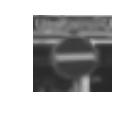

In [86]:
import skimage.transform
import numpy as np

# Resize images and #normalize min/max
# _gray1 = rgb2gray(X_train)

image_size = 32
num_channels = 1


# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/4_convolutions.ipynb
def reformat(dataset, labels):
    dataset = change_to_gray_normalize (dataset)
    dataset = np.reshape(dataset, (-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = (np.arange(n_classes) == labels[:, None]).astype(np.float32) # one & hot encode
    return dataset, labels

# change to grey scale & normalize (0-1)
# https://codedump.io/share/AbxxuPPXSXZQ/1/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def change_to_gray_normalize(images_set):
    new_images_set = []
    for image in images_set :
        new_images_set.append (np.dot(image[...,:3],[0.2989, 0.5870, 0.1140]) / 256.0)
    return new_images_set

# show test image
def show_one_image (img) :
    plt.figure(figsize=(1, 1))
    plt.axis('off')

    
    if (img.shape[2]==1): # if gray image
        newImg = np.dstack((img, img, img))
        plt.imshow(newImg,  cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1)
    else :
        plt.imshow(img)
    plt.show()   


#  split train set --> train set & validation set (90%:10%) 
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,
                                                                                test_size=0.1,
                                                                              random_state=0)
#check size and set 
print ("# num of new train set = ", len(X_train))
print ("# num of new validation set = " , len(X_validation))

n_train_new = len(X_train) # new value

       
# ------------------ Before -------------
print ("\n*Before")
print ("X_train.shape: ",X_train.shape)
print ("X_train Range of value =", X_train.min(),"~", X_train.max())
print ("y_train.shape: ",y_train.shape)
print ("y_train[0]: ",y_train[0])
show_one_image(X_train[0]) # sample image


# now transform & normalize
X_train_new, y_train_new = reformat(X_train, y_train)
X_validation_new, y_validation_new = reformat(X_validation, y_validation)       
X_test_new, y_test_new = reformat(X_test, y_test)


# ------------------ After -------------
print ("*After reformat")
print ("X_train_new.shape: ",X_train_new.shape)
print ("X_train Range of value =", X_train_new.min(),"~", X_train_new.max())
print ("y_train_new.shape: " ,y_train_new.shape)
print ("y_train_new[0]: ",y_train_new[0])
show_one_image(X_train_new[0]) # sample image


# only for debugging
#for image in X_train_new[:5]:
#    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

##### 1. Split train set : Train set / Validaton set (90:10)
First of all I want to get validation set, so split Train set into 2 part. Validation set part is 10% of original training set. When I make model and when small test I will use this set. Afterall all training is done, then I will use test set from original file.


from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,
                                                                                test_size=0.1,
                                                                              random_state=0)
##### 2. Change images to Grayscale & normalize
To efficent process, I change color images into color images. And the color value is changed from [0:256] to [0:1.0] with same reason. When training the the scale of value is from 0 to 1, then more fast calculation is processed.

##### 3. Reformat into Tensorflow-friendly & 1-hot Encoding
And Image reformat into TensorFlow-frendly shape. because I will use convolution network, it needs image data formatted as a cube. So one more channel(height) is added. 
And for process label, it is changed into float 1-hot encodings.

After that, I've checked all changes include images, shapes.
    

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Above "1." of answer 1 is my answer of this question. Thanks.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [146]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Reference
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/afe0660b-a035-499b-9441-737d601e19df
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/4_convolutions.ipynb
# https://hunkim.github.io/ml/lab11.pdf 

import tensorflow as tf

# Parameters
learning_rate = 0.001
batch_size = 128
training_epochs = 20
test_size = 256

# Weights and Biases
# This is where the width of each layer gets set.
layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}
# We'll use the layer widths defined above to create the weights and biases.
weights = {
    'layer_1': tf.Variable(tf.random_normal(
        [5, 5, 1, layer_width['layer_1']], stddev=0.01)),
    'layer_2': tf.Variable(tf.random_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']], stddev=0.01)),
    'layer_3': tf.Variable(tf.random_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']], stddev=0.01)),
    'fully_connected_1': tf.Variable(tf.random_normal(
        [4 * 4 * 128, layer_width['fully_connected']], stddev=0.01)),
    #    'fully_connected_2': tf.Variable(tf.random_normal(
    #        [4*4*128, layer_width['fully_connected']], stddev=0.01)),
    'out': tf.Variable(tf.random_normal(
        [layer_width['fully_connected'], n_classes], stddev=0.01))
}
biases = {
    'layer_1': tf.Variable(tf.random_normal([32], stddev=0.01)),
    'layer_2': tf.Variable(tf.random_normal([64], stddev=0.01)),
    'layer_3': tf.Variable(tf.random_normal([128], stddev=0.01)),
    'fully_connected_1': tf.Variable(tf.random_normal([512], stddev=0.01)),
    #    'fully_connected_2': tf.Variable(tf.random_normal([512], stddev=0.01)),
    'out': tf.Variable(tf.zeros(n_classes))
}


# computes the convolution against weight W

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


# Max Pooling
# performs max pooling with the ksize parameter as the size of the filter.
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')


# Create model
def conv_net(x, weights, biases, p_keep_conv):  # , p_keep_hidden):
    # Layer 1 - 32*32*1 to 16*16*32
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)
    conv1 = tf.nn.dropout(conv1, p_keep_conv)

    # Layer 2 - 16*16*32 to 8*8*64
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)
    conv2 = tf.nn.dropout(conv2, p_keep_conv)

    # Layer 3 - 8*8*64 to 4*4*128
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3)

    conv3 = tf.nn.dropout(conv3, p_keep_conv)

    # Fully connected layer - 4*4*128 to 512
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected_1'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected_1']),
        biases['fully_connected_1'])
    # fc1 = tf.nn.tanh(fc1)
    fc1 = tf.nn.relu(fc1)

    # dropout
    fc1 = tf.nn.dropout(fc1, p_keep_conv)

    # Output Layer - class prediction - 512 to n_classes
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

optimizer = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predict = tf.nn.softmax(logits)

predict_op = tf.argmax(logits, 1)  # get max value in matrix
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))

# Initializing the variables
init = tf.initialize_all_variables()

# https://www.tensorflow.org/versions/r0.12/how_tos/variables/index.html
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    print ("Init")
    for i in range(1,training_epochs+1):
        print ("epoch ", i, end=" >>> ")

        for start, end in zip(range(0, n_train_new, batch_size), range(batch_size, n_train_new, batch_size)):
            batch_x = X_train_new[start:end]
            batch_y = y_train_new[start:end]

            # Run optimization operation (backprop) 
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        print("Epoch:", i, "cost=", "{:.9f}".format(c), end = ' ')


        # Test validation model
        test_indices = np.arange(len(X_validation_new))  # get A test batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]  # test 개수

        #correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))

        # get accuracy
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Accuracy(validation set ):",
            accuracy.eval({x: X_validation_new[test_indices], y: y_validation_new[test_indices],
                           keep_prob: 1.0}))

        
    print("Optimization Finished!")     
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy(All test set ):",
             accuracy.eval({x: X_test_new, y: y_test_new,keep_prob: 1.0}))
    
    # https://www.tensorflow.org/versions/r0.12/how_tos/variables/index.html
    # Save the variables to disk.
    save_path = saver.save(sess, "model.ckpt")
    
#     print ("Accuracy(All test set)=", i, np.mean(np.argmax(y_test_new, axis=1) ==
#             sess.run(predict_op,
#                      feed_dict={x: X_test_new, y: y_test_new,
#                      keep_prob: 1.0
#                      })))






#         X_temp_pic = X_test_new [0:10]
#         y_temp_pic = y_test_new [0:10]

#         guess =  sess.run(predict_op,
#                  feed_dict={x: X_temp_pic, y: y_temp_pic
#                      , keep_prob: 1.0})

#         print ("y=",np.argmax(y_temp_pic, axis=1), "guess=", guess)

# display_images_and_labels_titled(X_temp_pic,                      guess                      ) # show with label

Init
epoch  0 >>> Epoch: 0 cost= 3.452399731 Accuracy(validation set ): 0.0859375
epoch  1 >>> Epoch: 1 cost= 2.423970938 Accuracy(validation set ): 0.347656
epoch  2 >>> Epoch: 2 cost= 1.145773768 Accuracy(validation set ): 0.710938
epoch  3 >>> Epoch: 3 cost= 0.689924836 Accuracy(validation set ): 0.808594
epoch  4 >>> Epoch: 4 cost= 0.417026103 Accuracy(validation set ): 0.921875
epoch  5 >>> Epoch: 5 cost= 0.320134133 Accuracy(validation set ): 0.949219
epoch  6 >>> Epoch: 6 cost= 0.295313478 Accuracy(validation set ): 0.949219
epoch  7 >>> Epoch: 7 cost= 0.257445455 Accuracy(validation set ): 0.960938
epoch  8 >>> Epoch: 8 cost= 0.166823342 Accuracy(validation set ): 0.957031
epoch  9 >>> Epoch: 9 cost= 0.196318179 Accuracy(validation set ): 0.988281
epoch  10 >>> Epoch: 10 cost= 0.179802895 Accuracy(validation set ): 0.972656
epoch  11 >>> Epoch: 11 cost= 0.193780661 Accuracy(validation set ): 0.988281
epoch  12 >>> Epoch: 12 cost= 0.109408289 Accuracy(validation set ): 0.988281


#### Model
I select convolutional network for this recognition. Because many studies about recognition of small images uses CNN and get setisfactory results. So I choose CNN. And if use this project on next project, then there are so many signs in one picture(scenery), then it will be good selection, because CNN is more powerful when it has multiple shown images.

As I leaned [Udacity class](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/afe0660b-a035-499b-9441-737d601e19df) make convolutional Network.
It has 3 layers alternating between convolutions and max pooling followed by a fully connected and output layer. I've addes two drop out on the original network.

- convolution step (3)
  layer 1 : 32x32x1 -> 16x16x32 (Max pooling & drop out : 5x5 filter) 
  layer 2 : 16x16x32 -> 8x8x32  (Max pooling & drop out) 
  layer 3 : 8x8x32 -> 4x4x128   (Max pooling & drop out) 
- fully connected (1)
  connected : 4*4*128 to 512 -> n_classes(# of signsname) out put (1-hot encoding)

Drop out is very efficient way for reducing overfitting, so I attach 4 drop out process (every layer).




### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

#### Learning Parameters/Batch size / Epochs
I selected learing parameters like below.
    learning_rate = 0.001
    batch_size = 128
    training_epochs = 20
    test_size = 256

I set Total epoch set to 20, batch size is 128. And when it test with validation set with random selection, it has 256 test size. When all epoch is ended then run the full test with original test set. When it testes (validation & test) I set keep_prob value to 1.0 for real full process.

### Costs & accuracy check

every 1000 train set processed in the middle of epoch, check the cost 
Every end of epoch, accuracy of validation set.
End of training check the accuracy of real test set (one time)

#### Weights and Biases
I use default weights and biases by random value not zeros.
    tf.Variable(tf.random_normal([32], stddev=0.01))

#### Optimizer
I checked GradientDescentOptimzer, AdamOptimizer and RMSPropOptimizer. But the RMSPropOptimizer is very good result.
So last choice is RMSPropOptimizer. (Code below)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
    optimizer = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)
    


### Results

Init
epoch  0 >>> Epoch: 0 cost= 3.452399731 Accuracy(validation set ): 0.0859375
epoch  1 >>> Epoch: 1 cost= 2.423970938 Accuracy(validation set ): 0.347656
epoch  2 >>> Epoch: 2 cost= 1.145773768 Accuracy(validation set ): 0.710938
epoch  3 >>> Epoch: 3 cost= 0.689924836 Accuracy(validation set ): 0.808594
epoch  4 >>> Epoch: 4 cost= 0.417026103 Accuracy(validation set ): 0.921875
epoch  5 >>> Epoch: 5 cost= 0.320134133 Accuracy(validation set ): 0.949219
epoch  6 >>> Epoch: 6 cost= 0.295313478 Accuracy(validation set ): 0.949219
epoch  7 >>> Epoch: 7 cost= 0.257445455 Accuracy(validation set ): 0.960938
epoch  8 >>> Epoch: 8 cost= 0.166823342 Accuracy(validation set ): 0.957031
epoch  9 >>> Epoch: 9 cost= 0.196318179 Accuracy(validation set ): 0.988281
epoch  10 >>> Epoch: 10 cost= 0.179802895 Accuracy(validation set ): 0.972656
epoch  11 >>> Epoch: 11 cost= 0.193780661 Accuracy(validation set ): 0.988281
epoch  12 >>> Epoch: 12 cost= 0.109408289 Accuracy(validation set ): 0.988281
epoch  13 >>> Epoch: 13 cost= 0.121592000 Accuracy(validation set ): 0.996094
epoch  14 >>> Epoch: 14 cost= 0.179528967 Accuracy(validation set ): 0.984375
epoch  15 >>> Epoch: 15 cost= 0.204409614 Accuracy(validation set ): 0.992188
epoch  16 >>> Epoch: 16 cost= 0.116713740 Accuracy(validation set ): 0.992188
epoch  17 >>> Epoch: 17 cost= 0.186997905 Accuracy(validation set ): 0.992188
epoch  18 >>> Epoch: 18 cost= 0.143077075 Accuracy(validation set ): 0.988281
epoch  19 >>> Epoch: 19 cost= 0.166260242 Accuracy(validation set ): 0.992188
Optimization Finished!
Accuracy(All test set ): 0.945368

Cost is down when the epoch is passed.
Accuracy is more and more incresed about 99.2%


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

First time, I cannot understand about CNN, but I've read some books and paper, Now I can understand fully.

I try to solve this project from the huge resources about MNIST. Because handwrting number image  and Traffic sign is so similar and restricted results. So if some deep learing model runs well with MNIST, then also traffic sign. Of course, there are so many numbers in traffics signs is one factor of my guess.

After that, I search method which solve MNIST problem. Of course, Udacity lessons are satisfied, but it has some barrier on language, so I found this site http://hunkim.github.io/ml/ and study also. In this [lecture](https://www.youtube.com/watch?v=6KlkiKyjEu0&feature=youtu.be), if use CNN then correctness is near 99%. So I select CNN.

    Source : MNIST recognition http://hunkim.github.io/ml/lab10.pdf
        • Softmax VS Neural Nets for MNIST, 91.4% and 94.4%
        • Xavier initialization: 97.8%
        • Deep Neural Nets and Dropout: 98%
        • Convolutional Neural Networks : 99%

There is CNN model with 99% on above link, but I make mind use [Udacity model](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/afe0660b-a035-499b-9441-737d601e19df) which I studied. But some testing, I add drop out process to all. Of course, LeNet is concerned, but in my opnion it is so complecated to this simple problem.

And check variables. And optimization method is next problem. When my debugging process, I print out cost and corectness with evry batch. I tested traditional Gradient descent optimizer and Adam Optimizer, RMS PRop Optimizer. But I cannot find good solution with Gradient or Adam. There is very good result only with RMS Prop with learning rate 0.001. So, my last choice is RMS Prop. Unfortunately I didn't capture that my test data.

But from epoch 6, It's correctness is near 95.7%, I think it's very good choice.

And selecting batch soruce, is help of Hun Kim's lecture(Above). I borrow some idear from it's source and attach some technique with I googled.

The most big problem was it is not work anything at the first time. Because my ratio of understand CNN is so low and I just CTRL+C/V without any thoughts, first. After fail submitting P2 on due date, I study Deep learing again, from the scratch. After that, now, It works! The problem is everywhere, the input data transform is so wrong, and no logics  on my last project submission.

After success testing, I've attach one more fully connected layer, but there is notable improvement. So I deleted it's layer.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

sign01_left_prohibit.jpg: read (32, 32, 3)
sign02-1.jpg: read (32, 32, 3)
sign02-2.jpg: read (32, 32, 3)
sign02.jpg: read (32, 32, 3)
sign03.jpg: read (32, 32, 3)
sign04.jpg: read (32, 32, 3)
sign07.jpg: read (32, 32, 3)
sign07_1.jpg: read (32, 32, 3)
sign08-1.jpg: read (32, 32, 3)
sign08.jpg: read (32, 32, 3)
sign09.jpg: read (32, 32, 3)


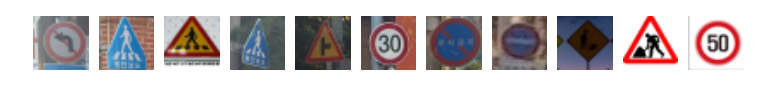

In [162]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
def display_images(images):

    plt.figure(figsize=(10, 10))

    i=1;
    for image in images:
        plt.subplot(1, 12, i)  # A grid of 2 rows x 5 columns
        i=i+1;
        plt.axis('off')
        plt.imshow(image)
                        
    plt.show() # show up all data
%matplotlib inline    

my_sign_images = []
for filename in os.listdir("my_traffic_signs") :
    img = cv2.imread("my_traffic_signs/" + filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA ) # resize to (32,32)
    my_sign_images.append(img)
    print(filename + ": read", my_sign_img.shape)
    
display_images(my_sign_images)    

my_sign_meaning = ["[1]NEW:NO left turn", 
                   "[2]28:Childern crossing (or Pedestrians)",
                   "[3]28:Childern crossing (or Pedestrians)", # same above but differnt color
                   "[4]28:Childern crossing (or Pedestrians)", #same above with differnt angle
                   "[5]11:Right-of-way at the next intersection",
                   "[6]1:Speed limit (30km/h)",
                   "[7]NEW: No Parking",
                   "[8]NEW: No Parking", # same above but low resolution
                   "[9]25:Road work",
                   "[10]25:Road work",
                   "[11]2:Speed limit (50km/h)"]

X_my_test, dummy = reformat(my_sign_images, np.zeros([len(my_sign_imgages),1] ))
    

In [118]:
# read csv file (which has sing names)
import csv

#https://docs.python.org/2/library/csv.html
traffic_sign_name = [None] * n_classes # class

with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        #print(row['ClassId'],"/", row['SignName'])
        traffic_sign_name[ int(row['ClassId'])] = row['SignName']

    print("sign=", traffic_sign_name) # check it

sign= ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

Model restored.


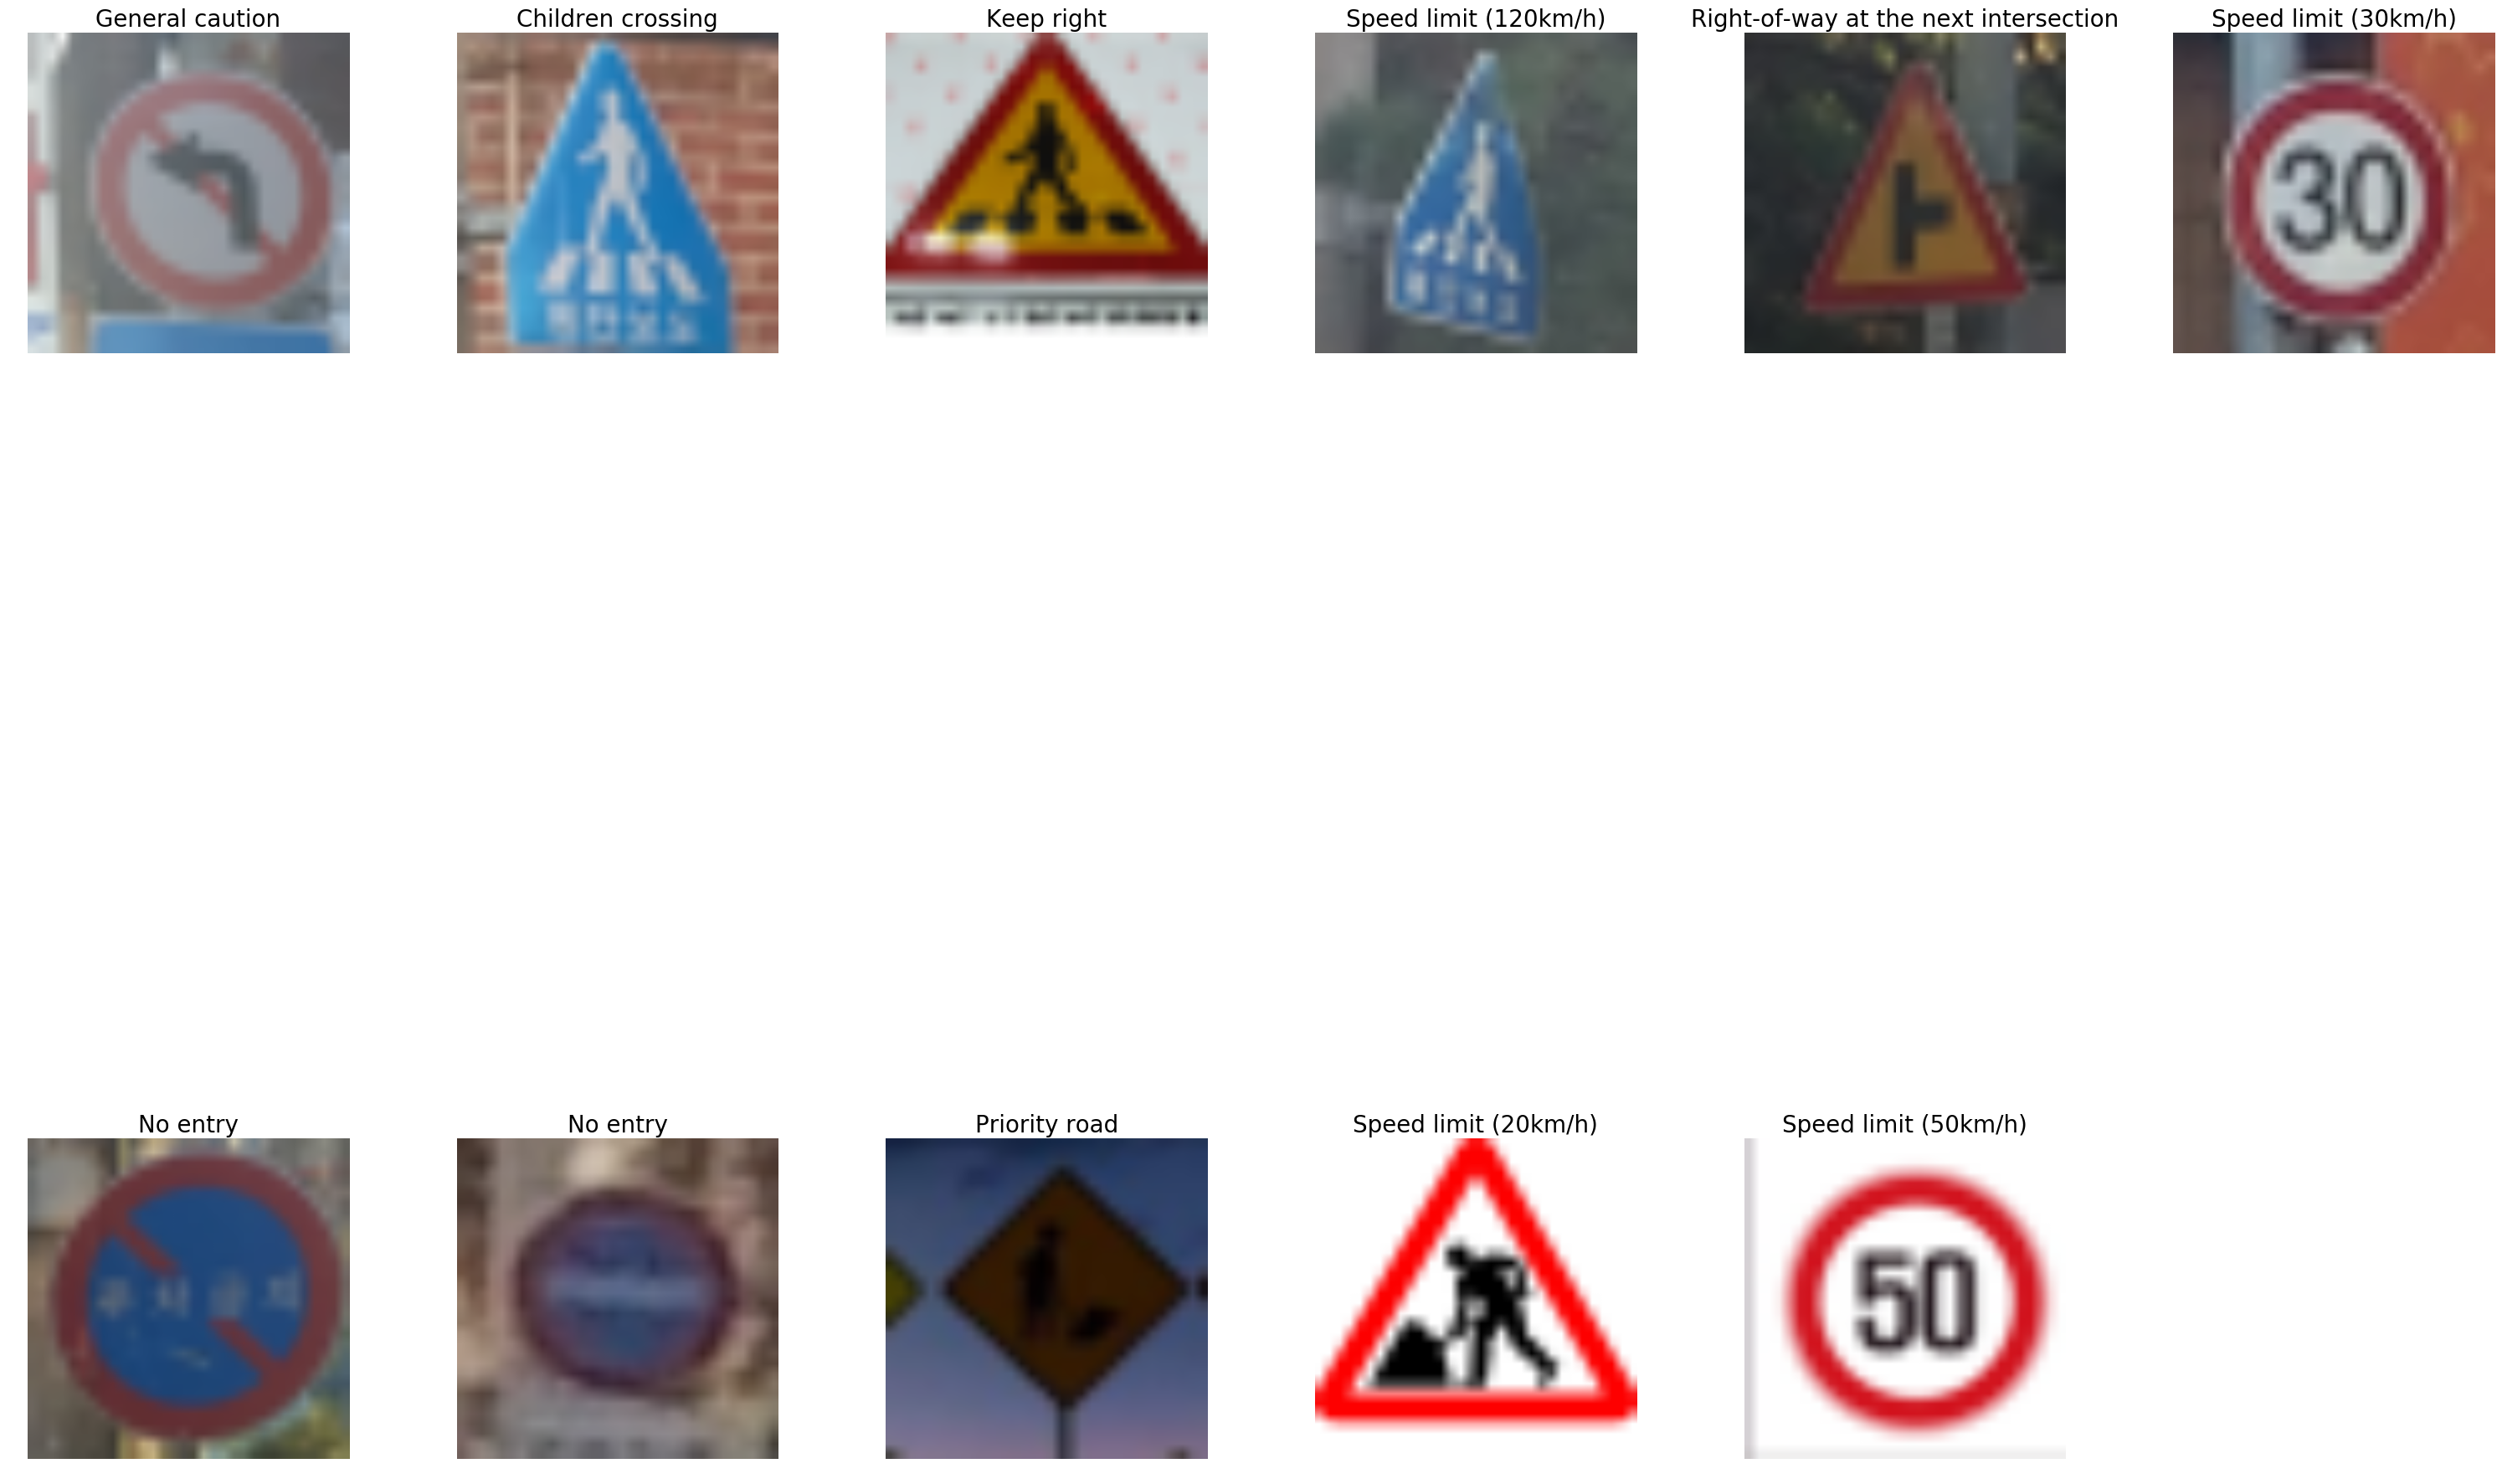

In [161]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# Restore variables from disk.
#https://www.tensorflow.org/versions/r0.12/how_tos/variables/index.html    



def display_images_and_labels_titled(images, labels):
    """Display the first image of each label."""

    plt.figure(figsize=(30, 30))
    i = 1

    for j in range (len(images)) :
        # for image in images:
        # Pick the first image for each label.
        #image = images[labels.index(label)]

        image = images[j]
        plt.subplot(2,6, i)  
        plt.axis('off')

        plt.title(traffic_sign_name[int(labels[j])],  fontsize=20) # show guess
        #plt.xlabel(my_sign_meaning[j]) # correct answer (bottom)

        i += 1
        #     for image in images:
        _ = plt.imshow(image)
    plt.tight_layout()
    plt.show()

with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")
    print("Model restored.")

    guess =  sess.run(predict_op,
                 feed_dict={x: X_my_test, keep_prob: 1.0})
    
display_images_and_labels_titled(my_sign_images,  guess ) # show with label    

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

No. Not at all.
My model works only well only speed limit sign and some directional sign.
It's corectness is only 40%. Of course, some local signs can be wrong, but "Road work" sign is so easy to find, I think, but it failed to recognize. More and more research and improvement is need.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

Model restored.


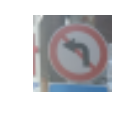

[Correct]  [1]NEW:NO left turn 
[*Prediction*]
General caution : 0.4828
Speed limit (70km/h) : 0.474
Traffic signals : 0.0411
Speed limit (30km/h) : 0.001
Keep right : 0.0003


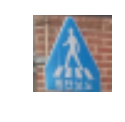

[Correct]  [2]28:Childern crossing (or Pedestrians) 
[*Prediction*]
Children crossing : 0.4869
Beware of ice/snow : 0.1424
Right-of-way at the next intersection : 0.1035
Bicycles crossing : 0.0721
Road narrows on the right : 0.0662


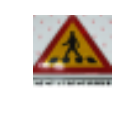

[Correct]  [3]28:Childern crossing (or Pedestrians) 
[*Prediction*]
Keep right : 0.249
Bicycles crossing : 0.1918
General caution : 0.1499
Road work : 0.1136
Road narrows on the right : 0.0532


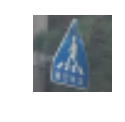

[Correct]  [4]28:Childern crossing (or Pedestrians) 
[*Prediction*]
Speed limit (120km/h) : 0.1929
Speed limit (50km/h) : 0.1545
Speed limit (100km/h) : 0.1091
Speed limit (60km/h) : 0.0968
Ahead only : 0.0683


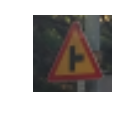

[Correct]  [5]11:Right-of-way at the next intersection 
[*Prediction*]
Right-of-way at the next intersection : 0.8167
Pedestrians : 0.1747
Roundabout mandatory : 0.0018
Road narrows on the right : 0.0016
General caution : 0.0014


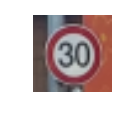

[Correct]  [6]1:Speed limit (30km/h) 
[*Prediction*]
Speed limit (30km/h) : 1.0
Speed limit (50km/h) : 0.0
Speed limit (80km/h) : 0.0
Speed limit (20km/h) : 0.0
Speed limit (70km/h) : 0.0


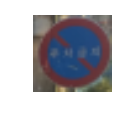

[Correct]  [7]NEW: No Parking 
[*Prediction*]
No entry : 0.9824
Stop : 0.0116
End of all speed and passing limits : 0.0011
Keep right : 0.001
Turn right ahead : 0.001


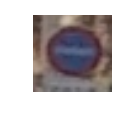

[Correct]  [8]NEW: No Parking 
[*Prediction*]
No entry : 0.628
Stop : 0.1308
No passing : 0.0483
Turn right ahead : 0.0291
End of all speed and passing limits : 0.0172


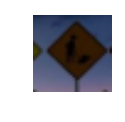

[Correct]  [9]25:Road work 
[*Prediction*]
Priority road : 0.6998
Roundabout mandatory : 0.1617
No entry : 0.0655
Turn right ahead : 0.0258
End of no passing by vechiles over 3.5 metric tons : 0.0159


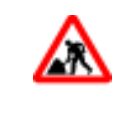

[Correct]  [10]25:Road work 
[*Prediction*]
Speed limit (20km/h) : 0.6887
Speed limit (30km/h) : 0.3112
Road narrows on the right : 0.0001
Speed limit (70km/h) : 0.0
General caution : 0.0


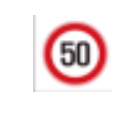

[Correct]  [11]2:Speed limit (50km/h) 
[*Prediction*]
Speed limit (50km/h) : 1.0
Speed limit (80km/h) : 0.0
Speed limit (30km/h) : 0.0
Speed limit (60km/h) : 0.0
Speed limit (100km/h) : 0.0


In [163]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")
    print("Model restored.")

    
    top_k_guess =  sess.run(tf.nn.top_k(predict, k=5),
                 feed_dict={x: X_my_test, keep_prob: 1.0})
    
    #display_images_and_labels_titled(my_sign_images,  guess ) # show with label  
    #print(top_k_guess.values)
    #print(top_k_guess.indices)
    i=0
    for index1, value1 in zip(top_k_guess.indices, top_k_guess.values):
        top_k_guess_name = [traffic_sign_name[index2] for index2 in index1] # search name

        
        show_one_image(my_sign_images[i]) # print image
        print ("[Correct] ", my_sign_meaning[i], "\n[*Prediction*]")
        for name, value in zip (top_k_guess_name, value1) : # print values
            print (name, ":", round(value, 4))
            
        i=i+1

        

[1] No left turn : It has local sign, so there is no answer
[2] correct
[3]children crossing' sign has no prediction.
[4]children crossing sign' is misunderstood speed limit sign.
[5] correct
[6] correct
[7] Almost same with No entry sign. 
[8] Almost same with No entry sign. 
[9] Road work --> No values for road work
[10] Road work -->No values for road work (may be it is changed left and right)
[11] correct



### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.